In [140]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# Any results you write to the current directory are saved as output.
from pandas import read_csv
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing (3).csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [141]:
print(np.shape(data))

(506, 14)


In [142]:
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

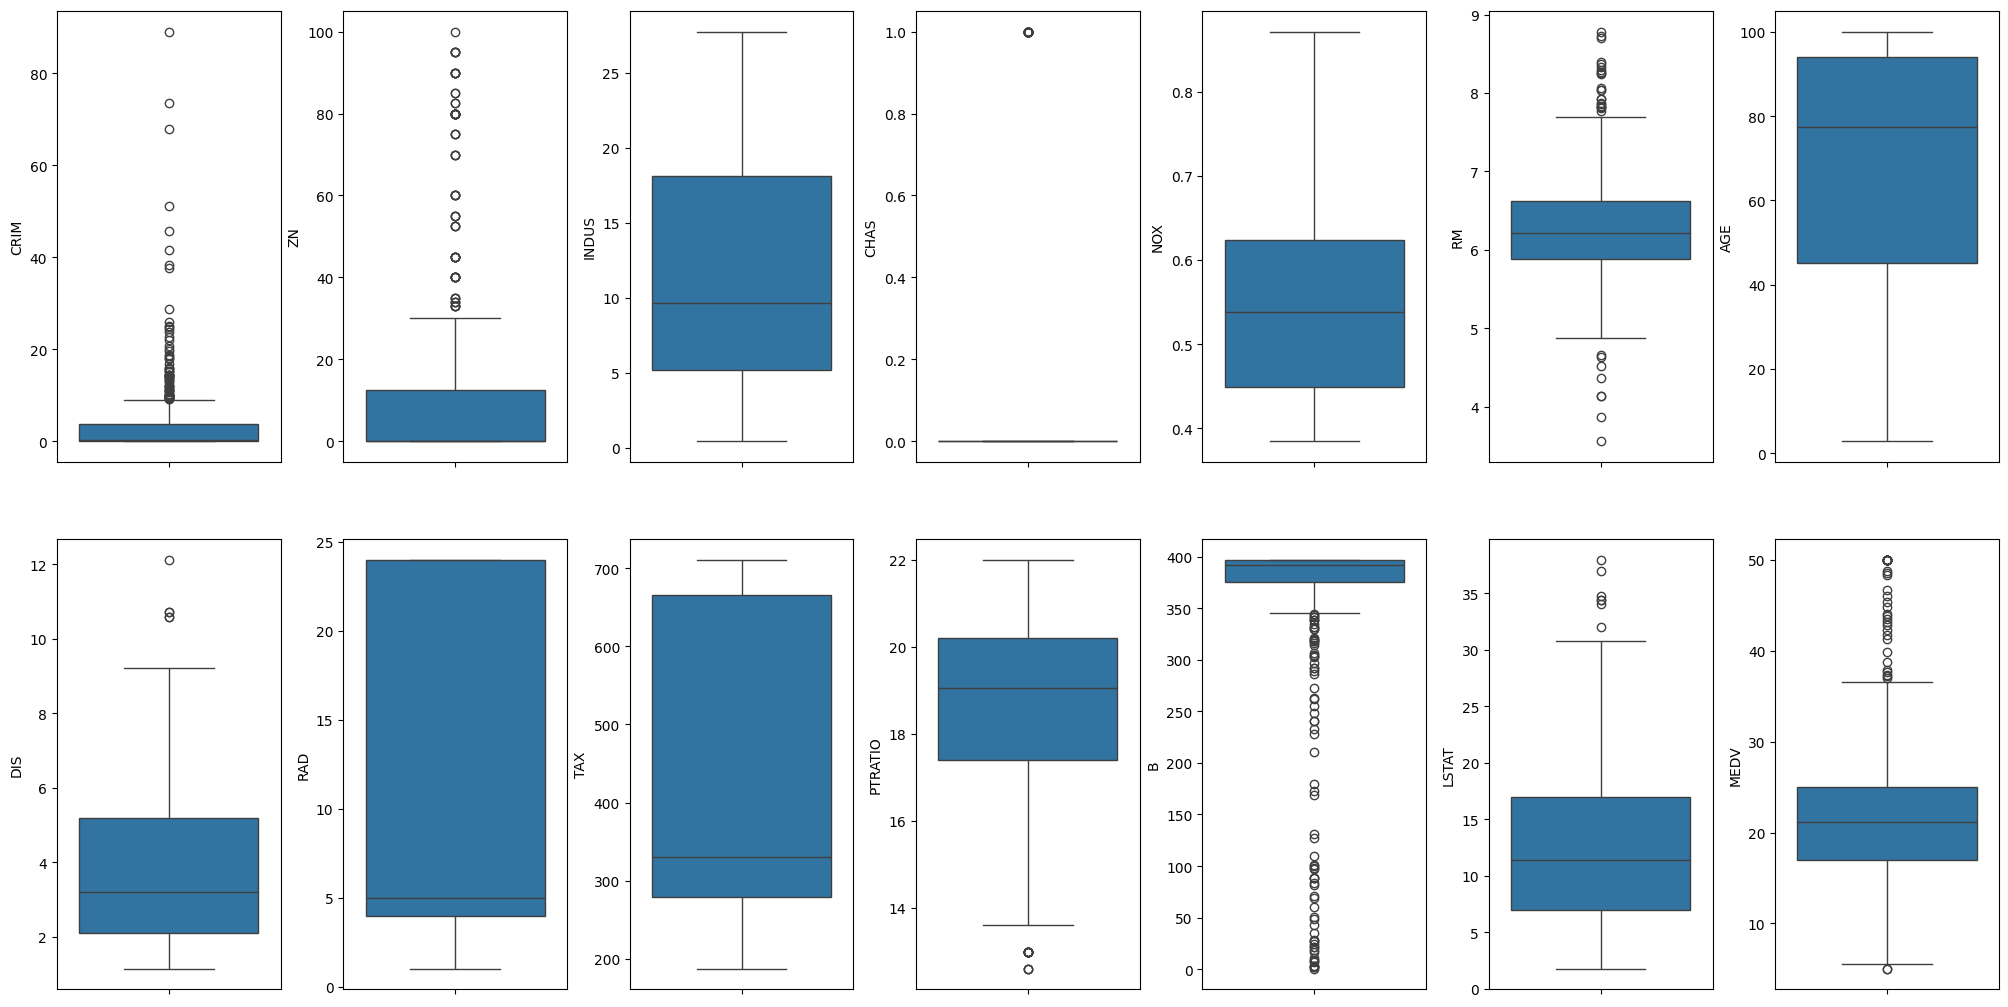

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [144]:
 for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [145]:
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(490, 14)


<Axes: >

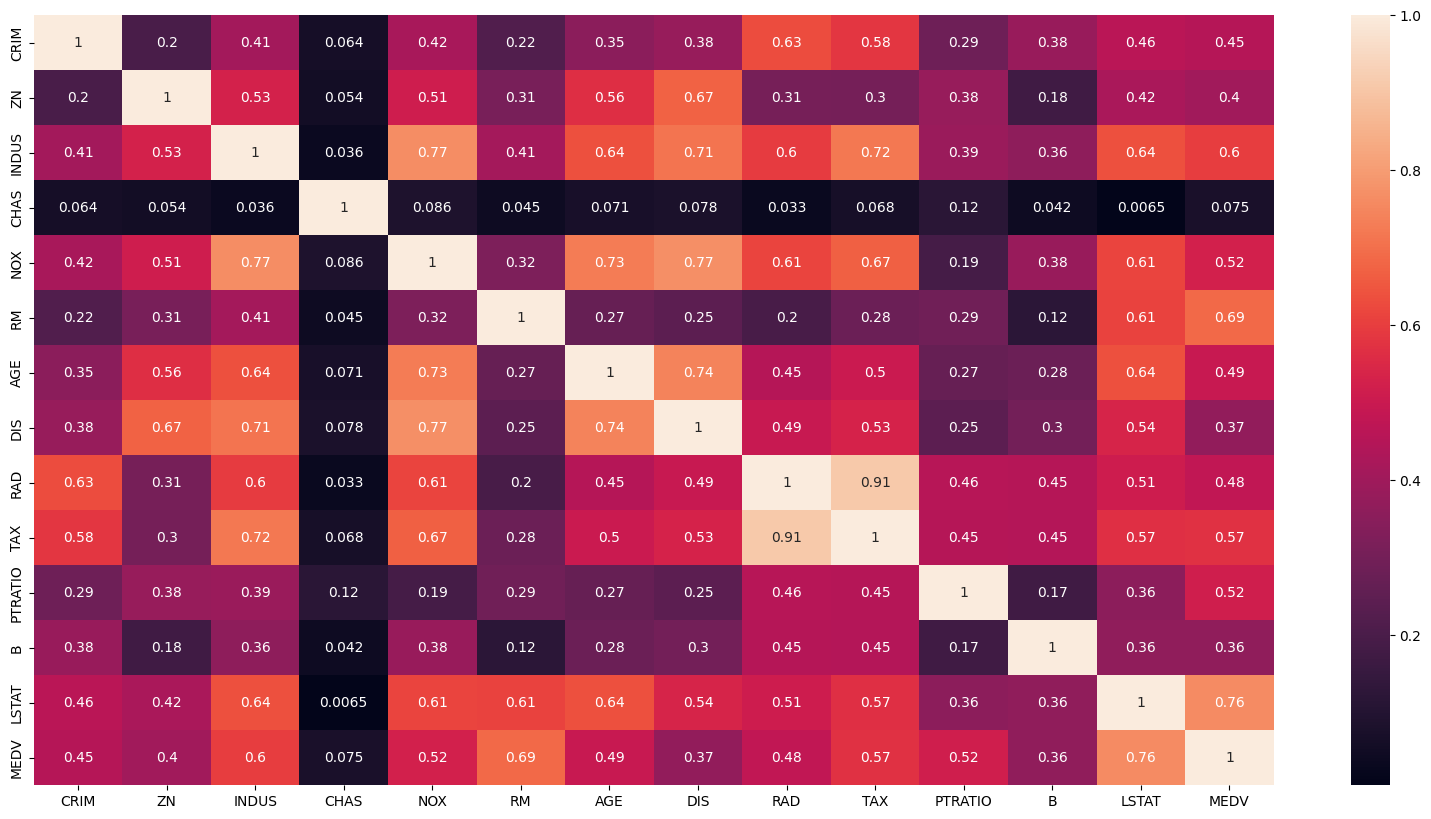

In [147]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

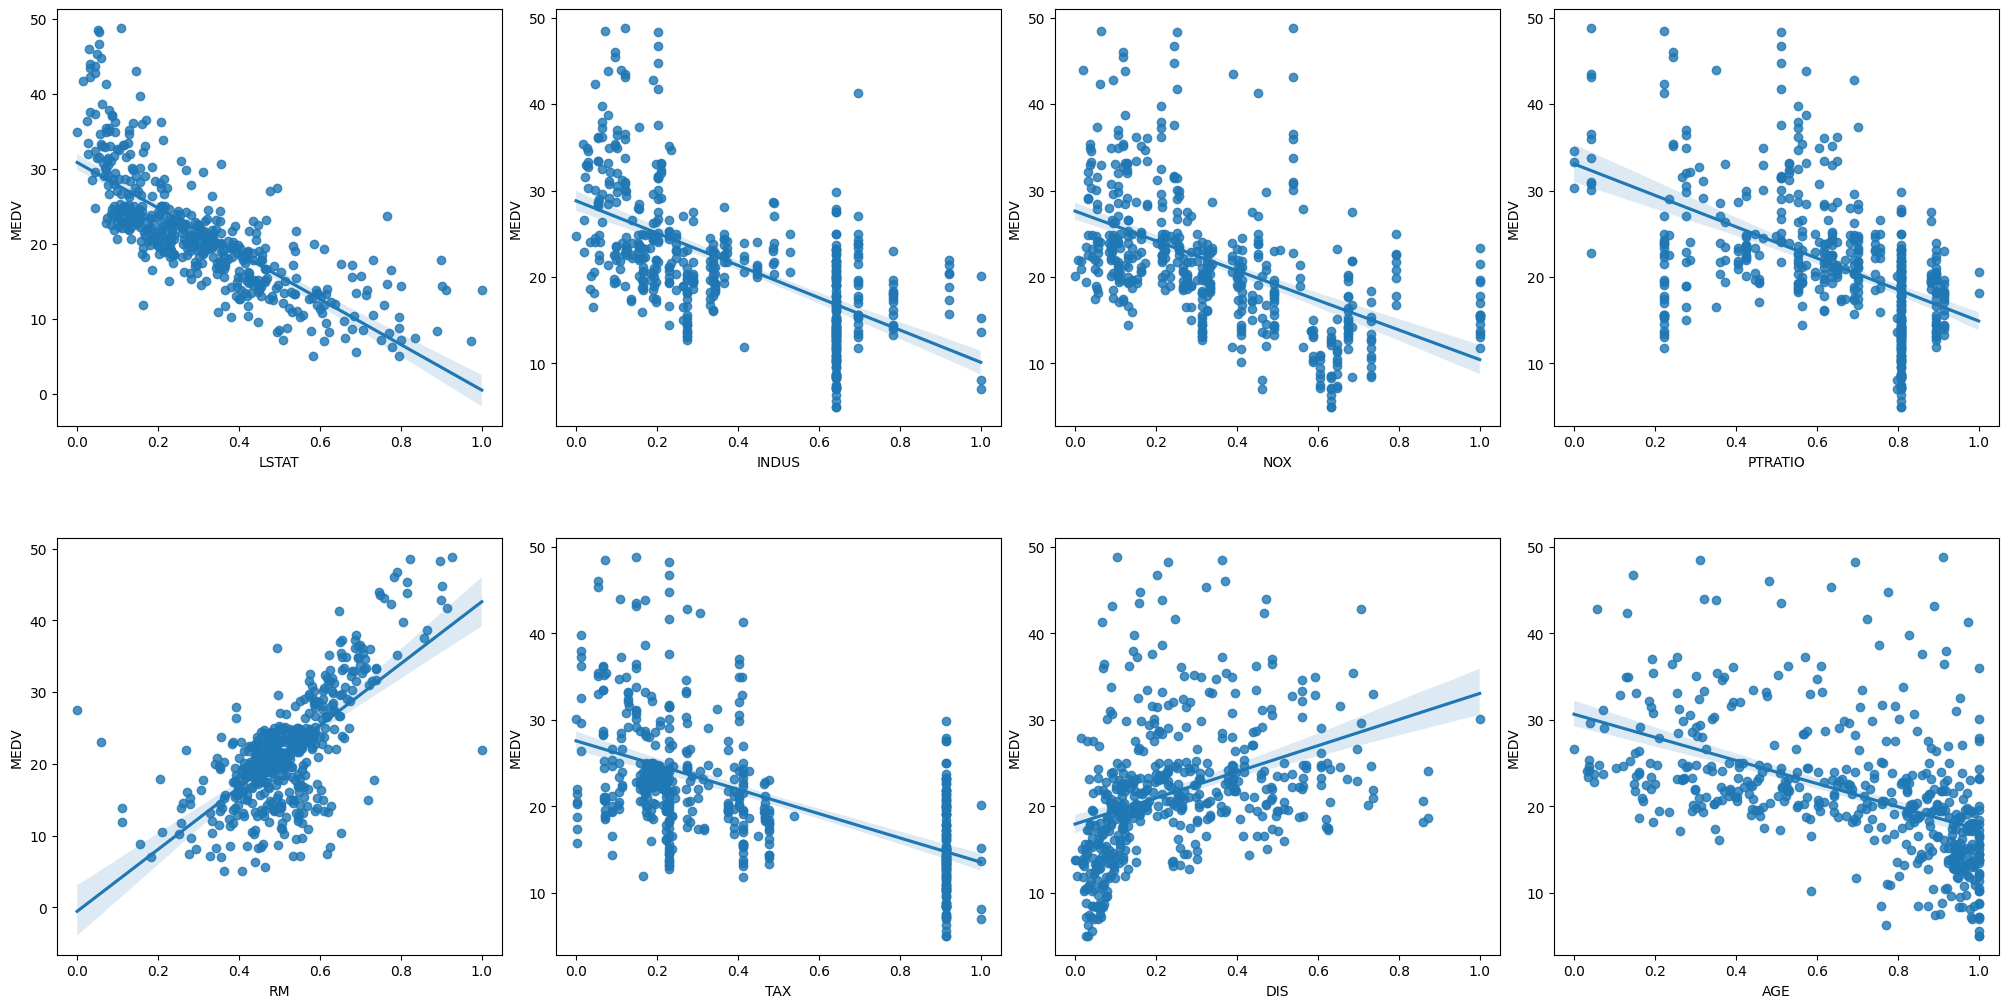

In [148]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [149]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [150]:
x = data.loc[:,column_sels]
y = data['MEDV']

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Assuming data is a DataFrame and column_sels is a list of column names for features
# For the example, we will create a dummy DataFrame
# data = pd.read_csv('path_to_your_data.csv')
# column_sels = ['list_of_selected_columns']

# Example data creation for the demonstration
# Replace with your actual data and column selections
data = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'MEDV': np.random.rand(100) * 50  # Randomly generated continuous target variable
})
column_sels = ['Feature1', 'Feature2']
x = data.loc[:, column_sels]
y = data['MEDV']

# Convert y to binary class labels based on median or another threshold
# For a multi-class scenario, you might use quantiles or other binning strategies
y_binarized = (y > y.median()).astype(int)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_binarized, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create and train the polynomial ridge classifier model
degree = 3  # Example degree
model = make_pipeline(PolynomialFeatures(degree=degree), RidgeClassifier())
model.fit(x_train_scaled, y_train)

# Predict and evaluate the model
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert accuracy to percentage
print(f"Polynomial Ridge Classifier (degree {degree}) Accuracy: {accuracy:.2f}%")


Polynomial Ridge Classifier (degree 3) Accuracy: 50.00%


In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Assuming data is a DataFrame and column_sels is a list of column names for features
# For the example, we will create a dummy DataFrame
# data = pd.read_csv('path_to_your_data.csv')
# column_sels = ['list_of_selected_columns']

# Example data creation for the demonstration
# Replace with your actual data and column selections
data = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'MEDV': np.random.rand(100) * 50  # Randomly generated continuous target variable
})
column_sels = ['Feature1', 'Feature2']
x = data.loc[:, column_sels]
y = data['MEDV']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create and train the SVR model
svr_model = SVR(kernel='rbf')  # 'rbf' kernel is commonly used, but you can choose others like 'linear' or 'poly'
svr_model.fit(x_train_scaled, y_train)

# Predict and evaluate the model
y_pred = svr_model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"SVR Mean Squared Error: {mse:.2f}")
print(f"SVR R-squared: {r2:.2f}")

SVR Mean Squared Error: 227.28
SVR R-squared: 0.06


In [152]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming data is a DataFrame and column_sels is a list of column names for features
# For the example, we will create a dummy DataFrame
# data = pd.read_csv('path_to_your_data.csv')
# column_sels = ['list_of_selected_columns']

# Example data creation for the demonstration
# Replace with your actual data and column selections
data = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'MEDV': np.random.rand(100) * 50  # Randomly generated continuous target variable
})
column_sels = ['Feature1', 'Feature2']
x = data.loc[:, column_sels]
y = data['MEDV']

# Convert y to binary classes for classification (example threshold)
y_binary = (y > y.median()).astype(int)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_binary, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier model
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = tree_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)*100

# Print the results
print(f"Decision Tree Classifier Accuracy: {accuracy:.2f}")


Decision Tree Classifier Accuracy: 50.00


In [153]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming data is a DataFrame and column_sels is a list of column names for features
# For the example, we will create a dummy DataFrame
# data = pd.read_csv('path_to_your_data.csv')
# column_sels = ['list_of_selected_columns']

# Example data creation for the demonstration
# Replace with your actual data and column selections
data = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'MEDV': np.random.rand(100) * 50  # Randomly generated continuous target variable
})
column_sels = ['Feature1', 'Feature2']
x = data.loc[:, column_sels]
y = data['MEDV']

# Convert y to binary classes for classification (example threshold)
y_binary = (y > y.median()).astype(int)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_binary, test_size=0.2, random_state=42)

# Create and train the KNN classifier model
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)*100

# Print the results
print(f"KNN Classifier Accuracy: {accuracy:.2f}")


KNN Classifier Accuracy: 65.00


In [230]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Assuming data is a DataFrame and column_sels is a list of column names for features
# For the example, we will create a dummy DataFrame
# data = pd.read_csv('path_to_your_data.csv')
# column_sels = ['list_of_selected_columns']

# Example data creation for the demonstration
# Replace with your actual data and column selections
data = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'MEDV': np.random.rand(100) * 50  # Randomly generated continuous target variable
})
column_sels = ['Feature1', 'Feature2']
x = data.loc[:, column_sels]
y = data['MEDV']

# Convert y to binary classes for classification (example threshold)
y_binary = (y > y.median()).astype(int)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_binary, test_size=0.2, random_state=42)

# Convert data to DMatrix format
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Define parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # Binary classification problem
    'eval_metric': 'error'  # Use error rate for evaluation
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
xgb_model = xgb.train(params, dtrain, num_rounds)

# Predict on the test set
y_pred = xgb_model.predict(dtest)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]  # Convert probabilities to binary labels

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)*100

# Print the accuracy
print(f"XGBoost Classifier Accuracy: {accuracy:.2f}")

XGBoost Classifier Accuracy: 70.00
